In [34]:
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import glob
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import scipy as s
import scipy.integrate
from scipy.integrate import simps
from scipy.integrate import quadrature
import scipy.interpolate
from scipy.interpolate import griddata
from matplotlib import rcParams
import glob
import os
from itertools import chain

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Helvetica') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 13})
matplotlib.rcParams['lines.linewidth'] = 1

STARf='/Users/mark/Desktop/DILUTE_DENSE/STAR_DATA/invNevtdNevtdNrawch_FIG2_2_minbias.txt'
STARdata=np.loadtxt(STARf)
dNdyAVGSTAR=10.2
NminSTAR05=23.4176

Nfiles=1 # DEPRECATED VARIABLE #

DIR='/Users/mark/Desktop/DILUTE_DENSE/DATA'

filenames = sorted(glob.glob(DIR+"/Multiplicity*"))
MultArray=np.zeros((len(filenames),3))

# IMPORT MULTPLICITY DATA WITH SEED NUMBER
n=0
for f in filenames:
    base=os.path.basename(f)
    tempf=os.path.splitext(base)[-2]
    SEED=tempf.replace('MultiplicityID','')
    mult=np.genfromtxt(f)
    #print(mult[0])
    MultArray[n,0]=float(mult[0])
    MultArray[n,1]=float(mult[1])
    MultArray[n,2]=int(SEED)
    n=n+1
    
FACTOR=   [0.08]
MinGluons=[2.00]
MinEvents=[2.00]


In [35]:
Nbins=50

multdata={}
bdata={}

multdata=MultArray[:,0]/FACTOR
bdata=MultArray[:,1]
seeddata=MultArray[:,2]

redmultdata=[]
redbdata=[]
redseeds=[]


for j in range(size(multdata)):
    if multdata[j] > MinGluons:
        redmultdata=np.append(redmultdata,multdata[j])
        redbdata=np.append(redbdata,bdata[j])
        redseeds=np.append(redseeds,seeddata[j])


In [36]:
Nbins=50

Nmin=0
Nmax=max(redmultdata)
dN=(Nmax-Nmin)/Nbins

binneddata={}

for fn in range(Nfiles):
    binneddata=np.zeros((Nbins,3))
    for j in range(Nbins):
        binneddata[j,0]=Nmin+(j+0.5)*dN
#print(redseeds)

In [65]:
binnedseeds=[]
for i in range(Nbins):
    binnedseeds.append([])

for i in range(size(redmultdata)):
    ind=int(np.ceil(redmultdata[i]/dN))-1
    if ind > Nbins-1:
        ind=Nbins-1
    binneddata[ind,1]+=2.0*pi*redbdata[i]
    binneddata[ind,2]+=1
    binnedseeds[ind].append(redseeds[i])
    #binneddata[ind,1]+=1

#print(binnedseeds)

finalseeds=[]
BinnedSelection=np.empty((0,3), float)
for i in range(Nbins):
    if binneddata[i,2] >= MinEvents:
        BinnedSelection=np.vstack([BinnedSelection,binneddata[i]])
        if(binneddata[i,0]>=NminSTAR05):
            print(binneddata[i,0], binnedseeds[i])
            finalseeds.append(binnedseeds[i])
        
print("Before="+str(size(binneddata))+" After="+str(size(BinnedSelection)))
# GET IN SINGLE LIST #
finalseeds = list(chain.from_iterable(finalseeds))

#print(selectedbinnedseeds)
print(finalseeds)

tot=s.integrate.simps(BinnedSelection[:,1],x=BinnedSelection[:,0])
avg=s.integrate.simps(BinnedSelection[:,0]*BinnedSelection[:,1],x=BinnedSelection[:,0])/tot


23.4368275 [1521487067.0, 1521487090.0, 1521487170.0, 1521487241.0, 1521487291.0, 1521487352.0, 1521487511.0, 1521487584.0, 1521487602.0, 1521487746.0, 1521487942.0, 1521487971.0]
24.5269125 [1521487099.0, 1521487107.0, 1521487288.0, 1521487323.0, 1521487525.0, 1521487662.0, 1521487736.0]
25.6169975 [1521487068.0, 1521487207.0, 1521487209.0, 1521487375.0, 1521487412.0, 1521487435.0, 1521487464.0, 1521487587.0, 1521487801.0, 1521487803.0, 1521487937.0, 1521487957.0]
26.7070825 [1521487079.0, 1521487105.0, 1521487397.0, 1521487411.0, 1521487438.0, 1521487503.0, 1521487569.0, 1521487656.0]
27.7971675 [1521487489.0, 1521487512.0, 1521487592.0, 1521487597.0]
28.8872525 [1521487171.0, 1521487223.0, 1521487631.0, 1521487740.0]
29.9773375 [1521487651.0, 1521487668.0]
32.1575075 [1521487084.0, 1521487257.0, 1521487478.0, 1521487770.0]
33.2475925 [1521487775.0]
34.3376775 [1521487157.0, 1521487787.0]
35.4277625 [1521487154.0, 1521487274.0]
36.5178475 [1521487383.0]
39.7881025 [1521487060.0, 1521

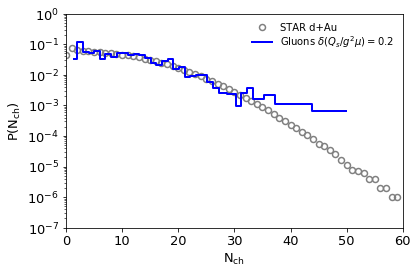

In [61]:
### PLOTTING ###
#plt.semilogy(binneddata[:,0],binneddata[:,1]/tot)
my_dpi=300
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

ax.set_xticks(range(0,90,10))
ax.set_yticks([10**(n) for n in range(-7,1,1)])
ax.set
plt.xlim([0,60])
plt.ylim([1e-7,1e0])
ax.set_yscale('log')
plt.xlabel(r'$\rm N_{ch}$')
plt.ylabel(r'$\rm P(N_{ch})$')

plt.plot(STARdata[:,0],STARdata[:,1],label='STAR d+Au',linestyle='None',marker='o',fillstyle='none',color='gray',mew=1.5)

plt.plot(BinnedSelection[:,0]*dNdyAVGSTAR/avg,BinnedSelection[:,1]/tot,label='Gluons $\delta(Q_s/g^2{\mu})=0.2$',drawstyle='steps-mid',color='b',linewidth=2)

plt.legend(frameon=False,labelspacing=0.1,fontsize='10')

plt.tight_layout()

#plt.savefig('/Users/mark/Desktop/DILUTE_DENSE/NERSC/dAuMult_best_comp.png',dpi=300)
plt.show()

In [62]:
selectedfiles=[]
for i in range(0,len(finalseeds)):
    fn="SingleInclusiveID"+str(int(finalseeds[i]))+".txt"
    selectedfiles.append(str(fn))
print(size(selectedfiles))

64


SingleInclusiveID1521487067.txt
SingleInclusiveID1521487090.txt
SingleInclusiveID1521487170.txt
SingleInclusiveID1521487241.txt
SingleInclusiveID1521487291.txt
SingleInclusiveID1521487352.txt
SingleInclusiveID1521487511.txt
SingleInclusiveID1521487584.txt
SingleInclusiveID1521487602.txt
SingleInclusiveID1521487746.txt
SingleInclusiveID1521487942.txt
SingleInclusiveID1521487971.txt
SingleInclusiveID1521487099.txt
SingleInclusiveID1521487107.txt
SingleInclusiveID1521487288.txt
SingleInclusiveID1521487323.txt
SingleInclusiveID1521487525.txt
SingleInclusiveID1521487662.txt
SingleInclusiveID1521487736.txt
SingleInclusiveID1521487068.txt
SingleInclusiveID1521487207.txt
SingleInclusiveID1521487209.txt
SingleInclusiveID1521487375.txt
SingleInclusiveID1521487412.txt
SingleInclusiveID1521487435.txt
SingleInclusiveID1521487464.txt
SingleInclusiveID1521487587.txt
SingleInclusiveID1521487801.txt
SingleInclusiveID1521487803.txt
SingleInclusiveID1521487937.txt
SingleInclusiveID1521487957.txt
SingleIn

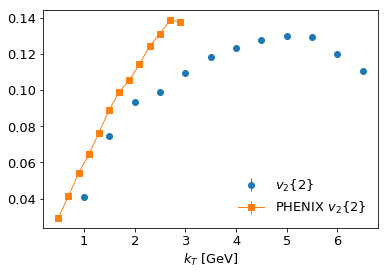

In [63]:
def plotv22fromcn(f,mkr,ls,mylabel,scale):
    x = np.genfromtxt(f, usecols=(0))
    c1 = np.genfromtxt(f, usecols=(1))
    c2 = np.genfromtxt(f, usecols=(2))

    v22=np.sqrt(c2)
    
    plt.errorbar(x*scale,v22,yerr=0,marker=mkr,fmt='o',linestyle=ls,label=mylabel)
    
def plotv22fromvn(f,mkr,ls,mylabel,scale):
    x = np.genfromtxt(f, usecols=(0))
    v22 = np.genfromtxt(f, usecols=(1))
    
    plt.errorbar(x*scale,v22,yerr=0,marker=mkr,fmt='o',linestyle=ls,label=mylabel)
    
# DETERMINE SIZE OF TOTAL DATA WITH SELECTED SEEDS
temp=np.genfromtxt(DIR+"/"+str(selectedfiles[0]))
rows,columns=temp.shape
AllData=np.zeros((len(selectedfiles),rows,columns))

#print(selectedfiles)
# GET DATA FROM SELECTED SEEDS
n=0
for files in selectedfiles:
    print(files)
    tempFile=np.genfromtxt(DIR+"/"+str(files))
    for i in range(0,rows):
        for j in range(0,columns):
            AllData[n][i][j]=tempFile[i][j]
    n=n+1

# AVERAGE DATA FOR SELECTED SEEDS
# ONLY V22 CURRENTLY
AverageData=np.zeros((len(AllData[0,:,0]),2))

for row in range(0,len(AllData[0,:,0])):
    sum0=0
    sum2=0
    n=0
    for dataset in range(0,len(AllData[:,0,0])):
        n=n+1
        sum0=sum0+AllData[dataset][row][0]
        sum2=sum2+AllData[dataset][row][4]*AllData[dataset][row][4]+AllData[dataset][row][5]*AllData[dataset][row][5]

    AverageData[row][0]=sum0/n
    AverageData[row][1]=sum2/n

# GET VALUES FOR PLOTTING
x = AverageData[:,0]
c2 = AverageData[:,1]
v22=np.sqrt(c2)

# PLOT

plt.errorbar(x,v22,yerr=0,fmt='o',label="$v_2\{2\}$")
#plotv22fromcn('DATA/test/Averagecn.txt','v','--','$v_2\{2\}$',1.0)

plotv22fromvn('PHENIX_DATA/v2pt.txt','s','-','PHENIX $v_2\{2\}$',1.0)


plt.figure(1)
plt.legend(frameon=False,loc='lower right',numpoints=1)
plt.xlabel('$k_T$ [GeV]')
plt.show()


In [ ]:
# #module to find best parameters
# Results={}

# NoverAbsNmin = 0.5;
# NoverAbsNmax = 4.0;

# Nbins = 50;
# for fn in range(Nfiles):
#     Minb=14
#     for FACTOR in arange(0.05,0.3,0.05):
#         for MinGluons in arange(0.0,10.0,0.5):
#                 Multiplicity=data[fn][:,0]/FACTOR
#                 ImpactParam=data[fn][:,1]
#                 RedMultiplicity=[]
#                 RedImpactParam=[]

#                 for j in range(size(Multiplicity)):
#                     if Multiplicity[j] > MinGluons:
#                         RedMultiplicity=np.append(RedMultiplicity,Multiplicity[j])
#                         RedImpactParam=np.append(RedImpactParam,ImpactParam[j])

#                 MinN=0
#                 MaxN=max(RedMultiplicity)
#                 deltaN=(MaxN-MinN)/Nbins

#                 BinnedMult={}

#                 BinnedMult=np.zeros((Nbins,3))
#                 for j in range(Nbins):
#                     BinnedMult[j,0]=MinN+(j+0.5)*deltaN

#                 for i in range(size(RedMultiplicity)):
#                     ind=int(np.ceil(RedMultiplicity[i]/deltaN-1e-9))-1
#                     BinnedMult[ind,1]+=RedMultiplicity[i]
#                     #BinnedMult[ind,1]+=1
#                 gridtable=[]

#                 nsteptot=1000
#                 for nstep in range(nsteptot+1):
#                     xv=NoverAbsNmin+nstep*(NoverAbsNmax-NoverAbsNmin)/nsteptot
#                     gridtable=np.append(gridtable,(np.interp(xv, dNdyAVGSTAR*STARdata[:,0], STARdata[:,1])-np.interp(xv, dNdyAVGSTAR*STARdata[:,0], STARdata[:,1]))**2)

                    
#                 Results[fn]=[FACTOR,MinGluons,Minb,0.0]
#                 #print(gridtable)
#                 #IntDiff=s.integrate.simps(BinnedMult[:,1],x=BinnedMult[:,0])

# print(Results)